In [9]:
GLOBA_PATH = input()

https://specs-picking-horizon-screenshots.trycloudflare.com


In [10]:
import time
import matplotlib.pyplot as plt
import yaml

import pandas as pd
import requests

HEALTH_PATH = GLOBA_PATH + "/health"
GET_RECO_PATH = GLOBA_PATH +  "/reco/userKNN_with_popular/{user_id}"
with open('../service/envs/authentication_env.yaml') as env_config:
    ENV_TOKEN = yaml.safe_load(env_config)

In [11]:
interactions = pd.read_csv('../data/kion_train/interactions.csv')
user_id = interactions['user_id'].iloc[0]
user_id

176549

In [12]:
response = requests.get(HEALTH_PATH, headers={"Authorization": f"Bearer {ENV_TOKEN['token']}"}).json()
response

'I am alive'

In [13]:
path = GET_RECO_PATH.format(user_id=user_id)
response = requests.get(path, headers={"Authorization": f"Bearer {ENV_TOKEN['token']}"}).json()
response

{'user_id': 176549,
 'items': [9728, 10440, 13865, 15297, 3734, 4151, 7571, 142, 8636, 13018]}

In [14]:
times = list()
for user_id in interactions['user_id'].tolist()[:100]:
    path = GET_RECO_PATH.format(user_id=user_id)
    start_time = time.monotonic()
    response = requests.get(path, headers={"Authorization": f"Bearer {ENV_TOKEN['token']}"}).json()
    times.append(time.monotonic() - start_time)
    print(response)

{'user_id': 176549, 'items': [9728, 10440, 13865, 15297, 3734, 4151, 7571, 142, 8636, 13018]}
{'user_id': 699317, 'items': [10440, 13865, 9728, 15297, 3734, 7571, 4151, 1105, 13851, 8067]}
{'user_id': 656683, 'items': [9728, 15297, 2657, 10440, 13865, 142, 4880, 3734, 4151, 6809]}
{'user_id': 864613, 'items': [15297, 10440, 13865, 9728, 3734, 4151, 142, 8636, 2657, 9996]}
{'user_id': 964868, 'items': [3182, 15297, 9728, 9506, 7582, 7571, 13018, 5411, 16166, 12173]}
{'user_id': 1032142, 'items': [6686, 1627, 15297, 10440, 875, 13896, 9726, 9497, 6522, 1700]}
{'user_id': 1016458, 'items': [10440, 9728, 13865, 15297, 3734, 4151, 142, 2657, 6809, 14741]}
{'user_id': 884009, 'items': [15297, 10440, 9728, 3734, 13865, 4151, 2657, 6809, 8636, 142]}
{'user_id': 648682, 'items': [13865, 9728, 10440, 15297, 3734, 4151, 11237, 142, 4880, 8636]}
{'user_id': 203219, 'items': [15297, 10440, 13865, 3734, 4151, 9728, 142, 8636, 2657, 9996]}
{'user_id': 791466, 'items': [2657, 12173, 3182, 16166, 1819,

{'user_id': 964775, 'items': [15297, 10440, 9728, 13865, 3734, 4151, 142, 8636, 2657, 6809]}
{'user_id': 980485, 'items': [9728, 13865, 10440, 15297, 3734, 4151, 14317, 6455, 6738, 142]}
{'user_id': 585751, 'items': [15297, 9728, 10440, 14431, 3182, 7571, 5411, 9169, 7829, 3734]}
{'user_id': 22688, 'items': [9728, 13865, 15297, 10440, 4151, 3734, 142, 6809, 8636, 11237]}
{'user_id': 1073809, 'items': [15297, 10440, 9728, 3734, 4151, 13865, 3182, 14431, 7571, 6809]}
{'user_id': 890735, 'items': [13865, 9728, 14200, 13927, 11237, 4740, 3349, 3838, 6796, 5282]}
{'user_id': 858651, 'items': [15297, 7571, 741, 13927, 14200, 6796, 7106, 10440, 3838, 3349]}
{'user_id': 1058641, 'items': [9728, 13865, 3734, 10440, 15297, 4151, 11237, 6809, 7571, 142]}
{'user_id': 1061176, 'items': [15297, 13865, 10440, 9728, 341, 10545, 15557, 3175, 12981, 577]}
{'user_id': 559630, 'items': [9728, 15297, 2657, 10440, 13865, 142, 4880, 3734, 4151, 6809]}
{'user_id': 875303, 'items': [9728, 13865, 11237, 3182, 1

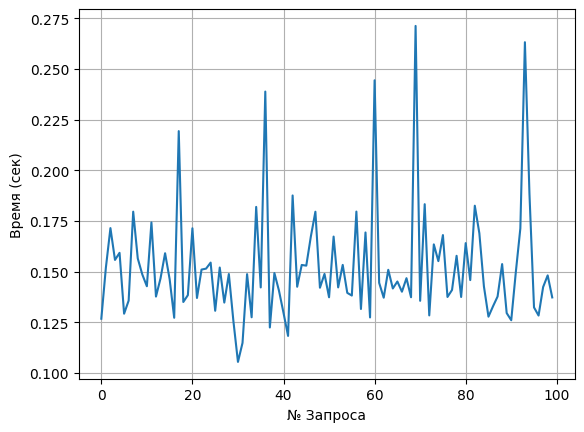

In [15]:
plt.plot([idx for idx in range(len(times))], times)
plt.grid()
plt.xlabel('№ Запроса')
plt.ylabel('Время (сек)');

In [16]:
path = GET_RECO_PATH.format(user_id=8888888)
response = requests.get(path, headers={"Authorization": f"Bearer {ENV_TOKEN['token']}"}).json()
response

{'user_id': 8888888,
 'items': [9728, 15297, 2657, 10440, 13865, 142, 4880, 3734, 4151, 6809]}

In [17]:
path = GET_RECO_PATH.format(user_id=9999999)
response = requests.get(path, headers={"Authorization": f"Bearer {ENV_TOKEN['token']}"}).json()
response

{'user_id': 9999999,
 'items': [9728, 15297, 2657, 10440, 13865, 142, 4880, 3734, 4151, 6809]}